## Naive Bayes Video Classifier
This notebook runs through YouTube Trending Video the classification of YouTube Trending video category based on title using Naive Bayes.

Additionally, we will compare the performance of two specific variants of Navive Bayes
    1. Multinomial Naive Bayes
    2. Bernouli Naive Bayes

In [1]:
import pandas as pd
import seaborn as sns
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from yellowbrick.text import FreqDistVisualizer

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve

import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

### Load in filtered dataset and look at the formatting
The columns of interest at ['filter_title', 'filter_title_no_stops', 'category_id']
    1. 'filter_title' --> raw input that only has punctuation removed and letters to lower case
    2. 'filter_title_no_stops' --> 'filter_title' data with addition to removal of stopwords
    3. 'category_id' --> output/buckets to categorize video (16 total)

In [3]:
df_titles_info = pd.read_csv('./output/US_count_vectorizer_dataset.csv')
df_titles_info.head()

,title,filter_title,filter_title_no_stops,category_id
0,WE WANT TO TALK ABOUT OUR MARRIAGE,we want to talk about our marriage,want talk marriage,People & Blogs
1,The Trump Presidency: Last Week Tonight with J...,the trump presidency last week tonight with jo...,trump presidency last week tonight john oliver...,Entertainment
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",racist superman rudy mancuso king bach lele pons,racist superman rudy mancuso king bach lele pons,Comedy
3,Nickelback Lyrics: Real or Fake?,nickelback lyrics real or fake,nickelback lyrics real fake,Entertainment
4,I Dare You: GOING BALD!?,i dare you going bald,dare going bald,Entertainment


### Separate the dataframe into inputs and outputs

In [4]:
df_x = df_titles_info['filter_title']
df_y = df_titles_info['category_id']
df_x_stop = df_titles_info['filter_title_no_stops']

target_names = list(df_titles_info['category_id'].unique())

### Split dataset before vectorizing
This guards against leaking information from testing to training set (80% training, 20% testing)

https://machinelearningmastery.com/data-leakage-machine-learning/
https://stackoverflow.com/questions/54491953/can-i-use-countvectorizer-on-both-test-and-train-data-at-the-same-time-or-do-i-n

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=117)
x_train_stop, x_test_stop = train_test_split(df_x_stop, test_size=0.2, random_state=117)

x_train_stop = x_train_stop.fillna(' ')
x_test_stop = x_test_stop.fillna(' ')
print("Training data size:", x_train.shape)
print("Testing data size:", x_test.shape)
print("Training data size:", x_train_stop.shape)
print("Testing data size:", x_test_stop.shape)

Training data size: (32759,)
Testing data size: (8190,)
Training data size: (32759,)
Testing data size: (8190,)


### Tokenizer words using CountVectorizer
Bag-of-Words model that allows both tokenize a collection of text documents and build a vocabulary of known words

The length of each individual vector will be that of the entire dataset which each indices representing the count of a specific word

In [6]:
count_vectorizer = CountVectorizer()
train_count_vector = count_vectorizer.fit_transform(x_train)
test_count_vector = count_vectorizer.transform(x_test)

train_count_vector_stop = count_vectorizer.fit_transform(x_train_stop)
test_count_vector_stop = count_vectorizer.transform(x_test_stop)

### Tokenizer words using TfidfTransformer
Will convert our count values from CountVectorizer into a frequency matrix

Term Frequency: How often a word appears in a particular title.
Inverse Document Frequency: Downscale this words that appear often across multiple titles.

Main purpose is to reduce the importance of stopwords that a common accross categories

In [7]:
tfidf_vectorizer = TfidfTransformer()
x_trained_tfidf_vector = tfidf_vectorizer.fit_transform(train_count_vector)
x_test_tfidf_vector = tfidf_vectorizer.transform(test_count_vector)

### Naive Bayes Model Training

In [8]:
clf_count = MultinomialNB()
clf_count.fit(train_count_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [9]:
clf_count_stop = MultinomialNB()
clf_count_stop.fit(train_count_vector_stop, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [10]:
clf_tfidf = MultinomialNB()
clf_tfidf.fit(x_trained_tfidf_vector, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Accuracy and Classification Report
Test the accuracy of our model usingth testing dataset

Tfidf Model
Accuracy:  0.860927960927961
Precision:  0.8821316148369487


C:\Users\sddjl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sddjl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sddjl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1:  0.8575833321942375
                       precision    recall  f1-score   support

     Autos & Vehicles       1.00      0.20      0.33        91
               Comedy       0.92      0.77      0.84       664
            Education       0.98      0.79      0.88       329
        Entertainment       0.72      0.97      0.82      2016
     Film & Animation       0.99      0.75      0.86       495
               Gaming       1.00      0.59      0.74       149
        Howto & Style       0.89      0.91      0.90       823
                Music       0.91      0.96      0.93      1245
      News & Politics       0.96      0.85      0.90       523
Nonprofits & Activism       0.00      0.00      0.00        10
       People & Blogs       0.96      0.72      0.82       660
       Pets & Animals       0.99      0.77      0.87       186
 Science & Technology       0.91      0.84      0.87       461
                Shows       1.00      0.57      0.73        14
               Sports       0.

C:\Users\sddjl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


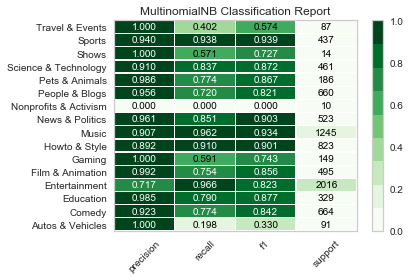

In [11]:
pred_tfidf = clf_tfidf.predict(x_test_tfidf_vector)
print("Tfidf Model")
print("Accuracy: ", accuracy_score(y_test, pred_tfidf))
print("Precision: ", metrics.precision_score(y_test, pred_tfidf, average='weighted'))
print("F1: ", metrics.f1_score(y_test, pred_tfidf, average='weighted'))
print(metrics.classification_report(y_test, pred_tfidf))


visualizer = ClassificationReport(clf_tfidf, support=True, cmap='Greens')
visualizer.fit(x_trained_tfidf_vector, y_train)
visualizer.score(x_test_tfidf_vector, y_test)
visualizer.show()

Count Model
Accuracy:  0.8996336996336997
Precision:  0.9007077699892384
F1:  0.8989440396735326
                       precision    recall  f1-score   support

     Autos & Vehicles       0.93      0.75      0.83        91
               Comedy       0.91      0.82      0.86       664
            Education       0.91      0.95      0.93       329
        Entertainment       0.89      0.89      0.89      2016
     Film & Animation       0.93      0.88      0.90       495
               Gaming       0.96      0.89      0.92       149
        Howto & Style       0.85      0.92      0.89       823
                Music       0.92      0.96      0.94      1245
      News & Politics       0.92      0.93      0.92       523
Nonprofits & Activism       1.00      0.20      0.33        10
       People & Blogs       0.91      0.83      0.87       660
       Pets & Animals       0.94      0.89      0.91       186
 Science & Technology       0.87      0.92      0.89       461
                Show

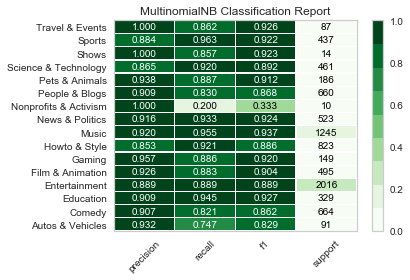

In [12]:
pred_count = clf_count.predict(test_count_vector)
print("Count Model")
print("Accuracy: ", accuracy_score(y_test, pred_count))
print("Precision: ", metrics.precision_score(y_test, pred_count, average='weighted'))
print("F1: ", metrics.f1_score(y_test, pred_count, average='weighted'))
print(metrics.classification_report(y_test, pred_count))


plt.title("Testing")
visualizer = ClassificationReport(clf_count, support=True, cmap='Greens')
visualizer.fit(train_count_vector, y_train)
visualizer.score(test_count_vector, y_test)
visualizer.finalize(set_title="this")

Tfidf Model
Accuracy:  0.9046398046398046
Precision:  0.9057277879908886
F1:  0.9043324194137408
                       precision    recall  f1-score   support

     Autos & Vehicles       0.94      0.79      0.86        91
               Comedy       0.92      0.84      0.88       664
            Education       0.97      0.93      0.95       329
        Entertainment       0.89      0.88      0.89      2016
     Film & Animation       0.93      0.89      0.91       495
               Gaming       0.96      0.89      0.93       149
        Howto & Style       0.86      0.93      0.89       823
                Music       0.91      0.96      0.93      1245
      News & Politics       0.92      0.93      0.92       523
Nonprofits & Activism       1.00      0.60      0.75        10
       People & Blogs       0.91      0.85      0.88       660
       Pets & Animals       0.94      0.92      0.93       186
 Science & Technology       0.87      0.94      0.90       461
                Show

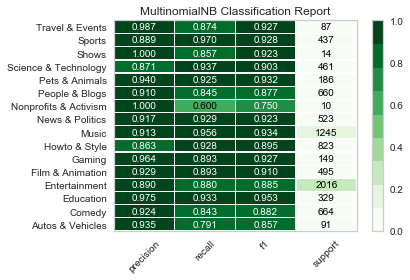

In [13]:
pred_count_stop = clf_count_stop.predict(test_count_vector_stop)
print("Tfidf Model")
print("Accuracy: ", accuracy_score(y_test, pred_count_stop))
print("Precision: ", metrics.precision_score(y_test, pred_count_stop, average='weighted'))
print("F1: ", metrics.f1_score(y_test, pred_count_stop, average='weighted'))
print(metrics.classification_report(y_test, pred_count_stop))


visualizer = ClassificationReport(clf_count_stop, support=True, cmap='Greens')
visualizer.fit(train_count_vector_stop, y_train)
visualizer.score(test_count_vector_stop, y_test)
visualizer.show()

### Confusion Matrix

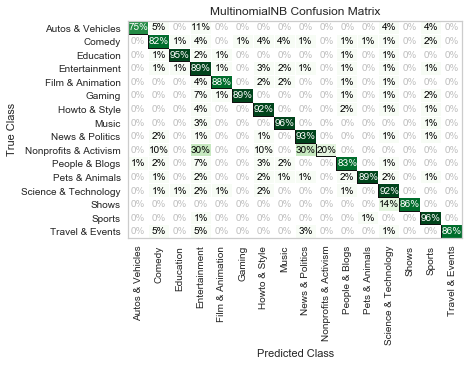

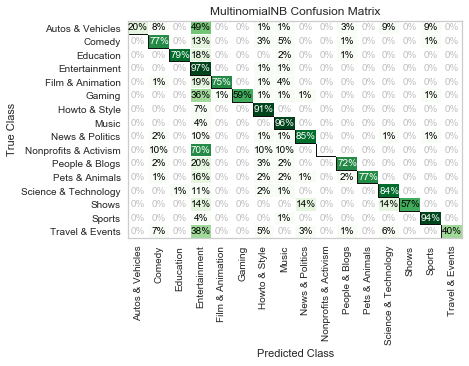

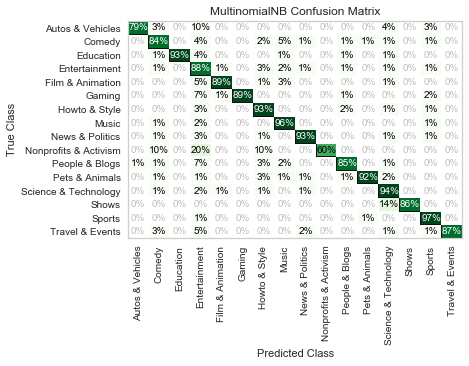

In [14]:
# conf_matrix = confusion_matrix(y_test, pred_count, labels=target_names)
# conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

# plt.figure(figsize=(15,6))
# sns.heatmap(conf_df, cmap='YlOrRd', annot=True, fmt='d')
# plt.title('Multinomial Naive Bayes Count\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_count)))
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()

# conf_matrix = confusion_matrix(y_test, pred_tfidf, labels=target_names)
# conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

# plt.figure(figsize=(15,6))
# sns.heatmap(conf_df, cmap='YlOrRd', annot=True, fmt='d')
# plt.title('Multinomial Naive Bayes Vector\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf)))
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()


conf_matrix = ConfusionMatrix(clf_count, percent=True, cmap='Greens')
conf_matrix.fit(train_count_vector, y_train)
conf_matrix.score(test_count_vector, y_test)
conf_matrix.show()

conf_matrix = ConfusionMatrix(clf_tfidf, percent=True, cmap='Greens')
conf_matrix.fit(x_trained_tfidf_vector, y_train)
conf_matrix.score(x_test_tfidf_vector, y_test)
conf_matrix.show()

conf_matrix = ConfusionMatrix(clf_count_stop, percent=True, cmap='Greens')
conf_matrix.fit(train_count_vector_stop, y_train)
conf_matrix.score(test_count_vector_stop, y_test)
conf_matrix.show()

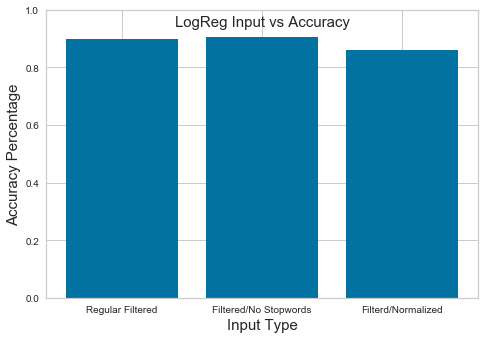

In [15]:
normalized_accuracy = accuracy_score(y_test, pred_tfidf)
regular_accuracy = accuracy_score(y_test, pred_count)
regular_accuracy_stop = accuracy_score(y_test, pred_count_stop)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.ylim(0, 1)
x = ["Regular Filtered", "Filtered/No Stopwords", "Filterd/Normalized"]
y = [regular_accuracy, regular_accuracy_stop, normalized_accuracy]

fig.suptitle('LogReg Input vs Accuracy', fontsize=15)
plt.xlabel('Input Type', fontsize=15)
plt.ylabel('Accuracy Percentage', fontsize=15)
ax.bar(x,y)
plt.show()

### Utilize SMOTE to oversample minority classes

In [16]:
smote = SMOTE(sampling_strategy='not majority')

x_train_smote, y_train_smote = smote.fit_sample(train_count_vector, y_train)

print(y_train.value_counts())
print()
print(y_train_smote.value_counts())
print()
print(y_test.value_counts())


NameError: name 'SMOTE' is not defined

In [ ]:
norm_smp = y_train.value_counts().rename_axis('categories').reset_index(name='counts')
plot_norm = sns.barplot(x='counts', y='categories',data=norm_smp, color=(0.2, 0.4, 0.6, 0.6))

In [ ]:
over_smp = y_train_smote.value_counts().rename_axis('categories').reset_index(name='counts')
plot_over = sns.barplot(x='counts', y='categories',data=over_smp, color=(0.2, 0.4, 0.6, 0.6))

In [ ]:
clf_count.fit(x_train_smote, y_train_smote)

pred_count_smote = clf_count.predict(test_count_vector)
print("Count Model")
print("Accuracy: ", accuracy_score(y_test, pred_count_smote))
print("Precision: ", metrics.precision_score(y_test, pred_count_smote, average='weighted'))
print("F1: ", metrics.f1_score(y_test, pred_count_smote, average='weighted'))
print(metrics.classification_report(y_test, pred_count_smote, target_names=target_names))


visualizer = ClassificationReport(clf_count, classes=target_names, support=True, cmap='Greens')
visualizer.fit(x_train_smote, y_train_smote)
visualizer.score(test_count_vector, y_test)
visualizer.show()

In [ ]:
# conf_matrix = confusion_matrix(y_test, pred_count_smote, labels=target_names)
# conf_df = pd.DataFrame(conf_matrix, index=target_names, columns=target_names)

# plt.figure(figsize=(15,6))
# sns.heatmap(conf_df, cmap='YlGnBu', annot=True, fmt='d')
# plt.title('Multinomial SMOTE Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_count_smote)))
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.show()

conf_matrix = ConfusionMatrix(clf_count, cmap='Greens', percent=True)
conf_matrix.fit(x_train_smote, y_train_smote)
conf_matrix.score(test_count_vector, y_test)
conf_matrix.show()

In [ ]:
bern_count = BernoulliNB()
bern_count.fit(train_count_vector, y_train)

In [ ]:
bern_pred_count = bern_count.predict(test_count_vector)
print("Accuracy: ", accuracy_score(y_test, bern_pred_count))
print(metrics.classification_report(y_test, bern_pred_count))